# Evaluation of oversamplers with a set of classifiers on one database

In this notebook we give an example of optimizing oversamplers and classifiers for given dataset.

In [1]:
import smote_variants as sv

2022-08-16 15:21:06.390042: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:21:06.394090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 15:21:06.394143: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset = sv.datasets.load_illustration_2_class()

In [3]:
# specifying the classifiers

classifiers = [('sklearn.neighbors', 'KNeighborsClassifier', {}),
                ('sklearn.tree', 'DecisionTreeClassifier', {})]

In [4]:
oversamplers = [('smote_variants', 'SMOTE_ENN', {}),
                ('smote_variants', 'NEATER', {}),
                ('smote_variants', 'Lee', {})]

In [5]:
# executing the evaluation using 5 parallel jobs and at most 35 random but meaningful parameter combinations
# with the 5 quickest oversamplers

results= sv.evaluation.evaluate_oversamplers(datasets=[dataset],
                                    oversamplers=oversamplers,
                                    classifiers=classifiers,
                                    n_jobs=2)

2022-08-16 15:21:11.580483: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:21:11.580483: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:21:11.670324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 15:21:11.670332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot ope

In [6]:
# determining oversampler and classifier combination with highest AUC score

highest_auc_score= results['auc_mean'].idxmax()

In [7]:
# querying classifier and oversampler parameters with highest AUC score

cl, cl_mod, cl_par, samp, samp_par= results.loc[highest_auc_score][['classifier',
                                                           'classifier_module',
                                                           'classifier_params',
                                                           'oversampler',
                                                           'oversampler_params']]

In [8]:
# instantiating oversampler and classifier objects providing the highest AUC score

samp_obj = sv.base.instantiate_obj(('smote_variants', samp, eval(samp_par)))
cl_obj = sv.base.instantiate_obj((cl_mod, cl, eval(cl_par)))

In [9]:
# oversampling the entire dataset and fitting a classifier

X_samp, y_samp= samp_obj.sample(dataset['data'], dataset['target'])
cl_obj.fit(X_samp, y_samp)

2022-08-16 15:21:20,929:INFO:SMOTE_ENN: Running sampling via ('SMOTE_ENN', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'uniform', 'within_simplex_sampling': 'random', 'gaussian_component': None}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_ENN'}")
2022-08-16 15:21:20,931:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {'metric_tensor': None}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'uniform', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2022-08-16 15:21:20,933:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-08-16 15:21:20,934:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-08-16 15:21:20,937:INFO:SMOTE: simplex sampling with n_dim 2
2022-08-16 15:21:20,941:INFO:EditedNearestNeighbors: Running noise removal
2022-08-16 15:21:20,943:INFO:N

KNeighborsClassifier()

In [10]:
from smote_variants.visualization import plot_sampling_raw
import matplotlib.pyplot as plt

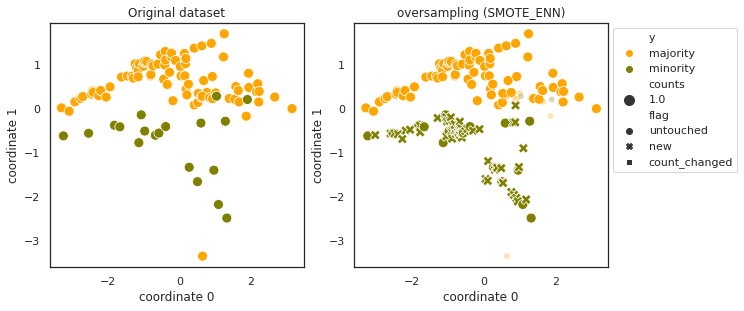

In [11]:
# plotting the oversampling with the best oversampler
_ = plot_sampling_raw(X=dataset['data'], y=dataset['target'],
                        X_samp=X_samp,
                        y_samp=y_samp,
                        title=f"oversampling ({samp_obj.__class__.__name__})")
plt.show()

In [12]:
# the fitted predictor
cl_obj.predict(dataset['data'])

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])